### Overview of the Titanic Dataset

The Titanic dataset includes demographics and passenger information from 891 of the 2,224 passengers and crew on board the Titanic.

### Key Features in the Dataset

The dataset includes several features that are commonly used to predict survival rates:

- **PassengerId**: An identifier for each traveler.
- **Survived**: Indicates if a passenger survived or not (0 = No, 1 = Yes).
- **Pclass**: Ticket class, a proxy for socio-economic status (1 = 1st, 2 = 2nd, 3 = 3rd).
- **Name**: The name of the passenger.
- **Sex**: The passenger's gender.
- **Age**: The passenger's age in years.
- **SibSp**: The number of siblings or spouses the passenger had aboard the Titanic.
- **Parch**: The number of parents or children the passenger had aboard the Titanic.
- **Ticket**: Ticket number.
- **Fare**: Passenger fare.
- **Cabin**: Cabin number.
- **Embarked**: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

### Challenges

The dataset poses several challenges:
- Handling missing data, especially for the 'Age' and 'Cabin' features.
- Deciding how to encode categorical variables.
- Creating meaningful new features from existing data, such as deriving titles from names, which might give clues about the social status, age, and therefore survival probability.
- Balancing the model's complexity with its accuracy.

In [ ]:
# Import pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Viewing Data
titanic = pd.read_csv('train.csv')

# Display the first few rows of the DataFrame
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Plot 1: Survival Rate by Passenger Class**
# New Section

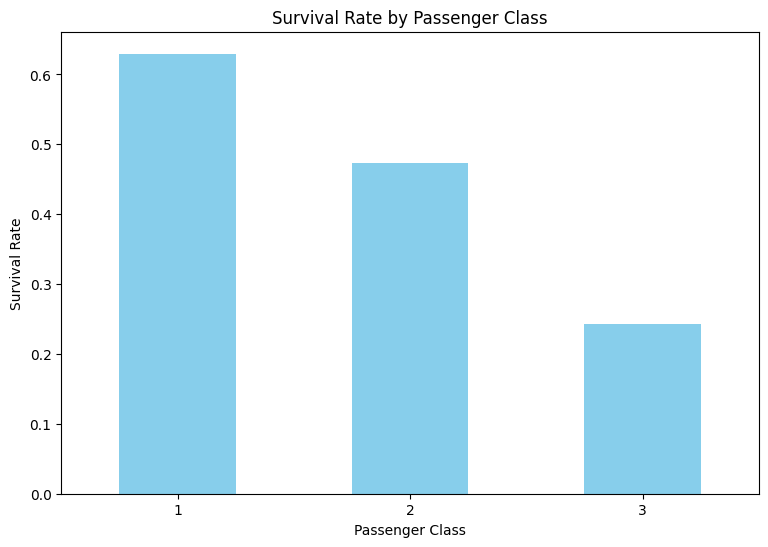

In [ ]:
survival_rate_by_class = titanic.groupby('Pclass')['Survived'].mean()
# Plotting
plt.figure(figsize=(9,6))
survival_rate_by_class.plot(kind='bar', color='skyblue')
# Add titles and labels
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


**Insight:** Higher classes (1st class) typically have higher survival rates, possibly due to better access to lifeboats and other safety mechanisms.

### **Plot 2: Age Distribution of Passengers by Survival**


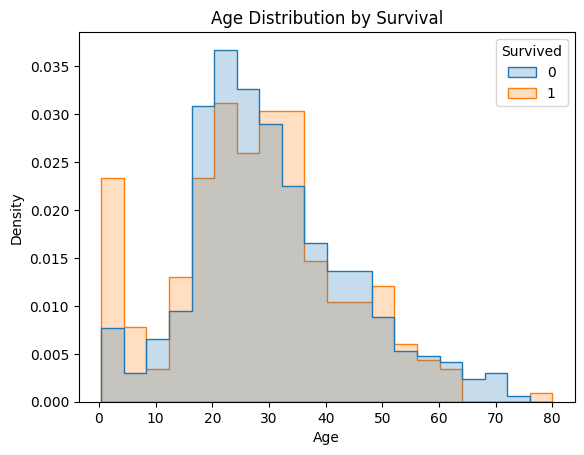

In [ ]:
# pass value of data, x and hue
sns.histplot(data=titanic, x='Age', hue='Survived', element='step', stat='density', common_norm=False)
# Add title and labels
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')

# Show the plot
plt.show()


**Insight:** Younger passengers tended to survive at higher rates than older passengers, with children having notably higher survival rates, indicating possible prioritization of children in rescue efforts.

### **Plot 3: Fare Distribution**

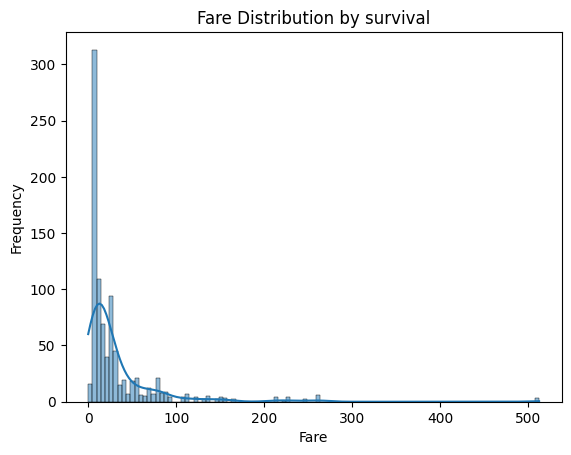

In [ ]:
sns.histplot(data=titanic, x='Fare', kde=True)

# Add title and labels
plt.title('Fare Distribution by survival')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# Show the plot
plt.show()



**Insight:** Passengers who paid higher fares, which likely correlates with higher passenger class, had better survival rates. The fare distribution is right-skewed, showing that most passengers paid lower fares.

### **Plot 4: Count of Passengers by Embarkation Port**


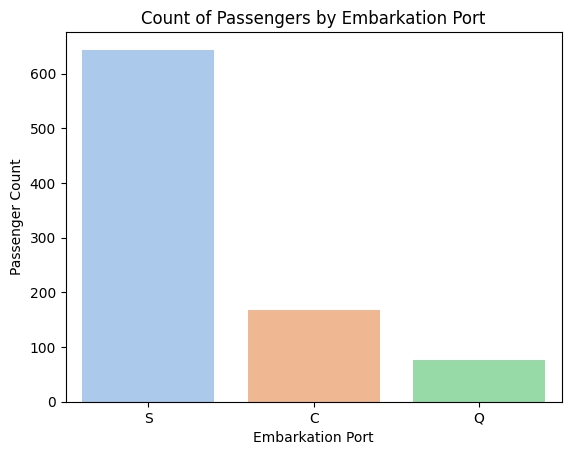

In [ ]:
import seaborn as sns
sns.countplot(data=titanic, x='Embarked', hue='Embarked', palette='pastel', legend=False)
#sns.countplot(data=titanic, x='Embarked', palette='pastel')
#survival_rate_by_class.plot(kind='bar', color='skyblue')
# Add title and labels
plt.title('Count of Passengers by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Passenger Count')

# Show the plot
plt.show()


**Insight:** Most passengers embarked from Southampton, which was the Titanic’s point of departure. This could influence survival rates and demographic patterns observed on board.

### **Plot 5: Boxplot of Ages by Class**

Text(0, 0.5, 'Age')

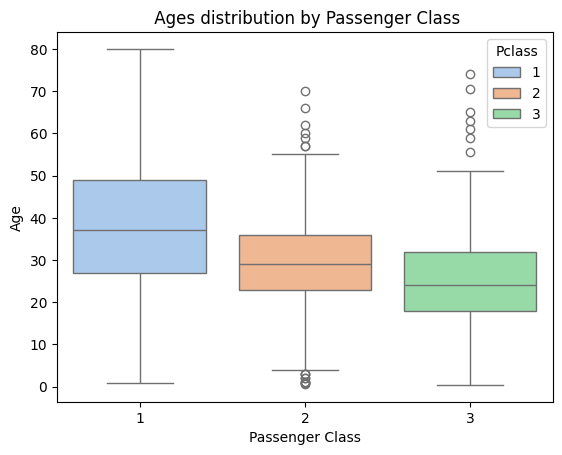

In [ ]:
sns.boxplot(data=titanic, x='Pclass', y='Age',hue='Pclass', palette='pastel', dodge=False)
# Add title and labels
plt.title(' Ages distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')


**Insight:** First class passengers tended to be older than those in third class, suggesting that wealthier, more established individuals were more likely to afford first-class accommodations.

### **Plot 6: Survival Rate by Gender and Class**

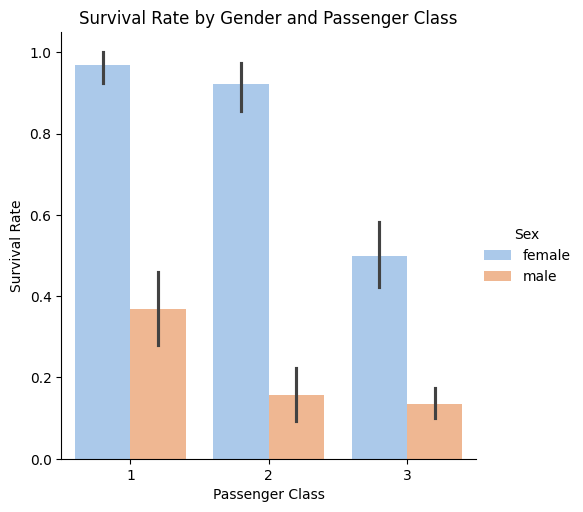

In [ ]:
sns.catplot(data=titanic, x='Pclass', hue='Sex', y='Survived', kind='bar', palette='pastel')
# Add title and labels
plt.title('Survival Rate by Gender and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Show the plot
plt.show()


**Insight:** This plot typically reveals that women had higher survival rates than men across all classes, with the highest survival rates among women in the first class, highlighting the "women and children first" policy and social norms of the era.

### **Plot 7: Embarkation by Fare and Age**

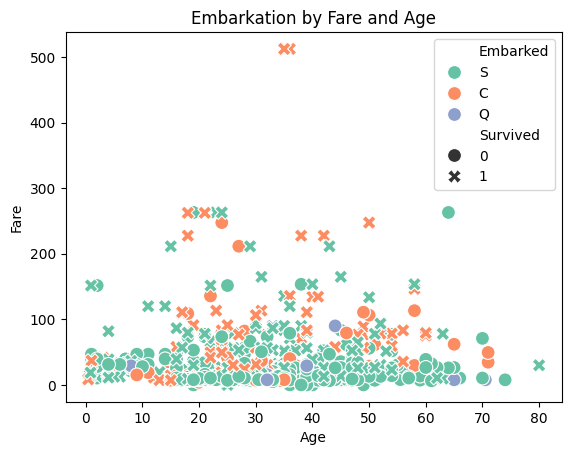

In [ ]:
sns.scatterplot(data=titanic, x='Age', y='Fare', hue='Embarked', style='Survived', palette='Set2', s=100)

# Add title and labels
plt.title('Embarkation by Fare and Age')
plt.xlabel('Age')
plt.ylabel('Fare')

# Show the plot
plt.show()



**Insight:** This plot can show if passengers from certain ports paid more and were older or younger, which may correlate with the economic conditions of those ports or the passenger strategies for securing Titanic tickets.

### **Plot 8: Deck Level and Survival**

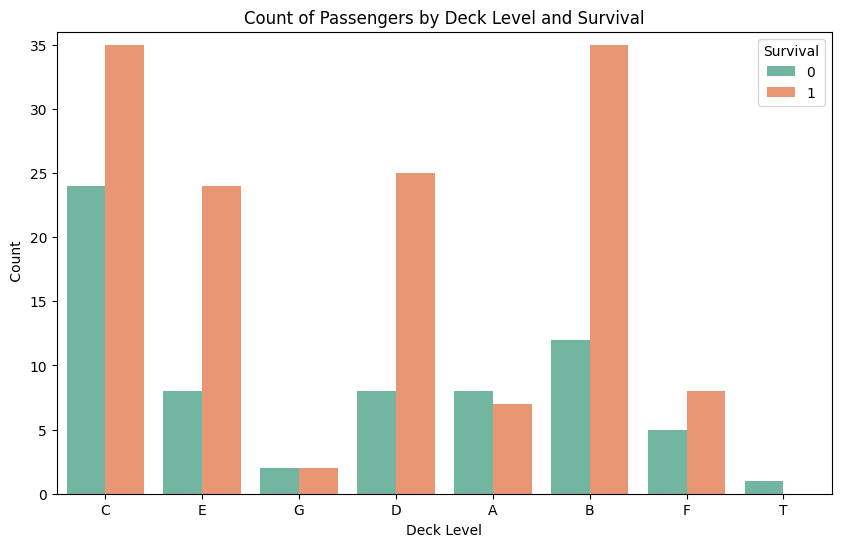

In [ ]:
titanic['Deck'] = titanic['Cabin'].str[0]
titanic = titanic[titanic['Deck'].notna()]
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic, x='Deck', hue='Survived', palette='Set2')
plt.title('Count of Passengers by Deck Level and Survival')
plt.xlabel('Deck Level')
plt.ylabel(' Count')
plt.ylim(0, 36)
plt.legend(title='Survival', labels=['0', '1'])
plt.show()

**Insight:** Passengers on higher decks may have had better access to lifeboats, thus higher survival rates, indicating the importance of cabin placement.



### **Plot 9: Family Size and Survival**

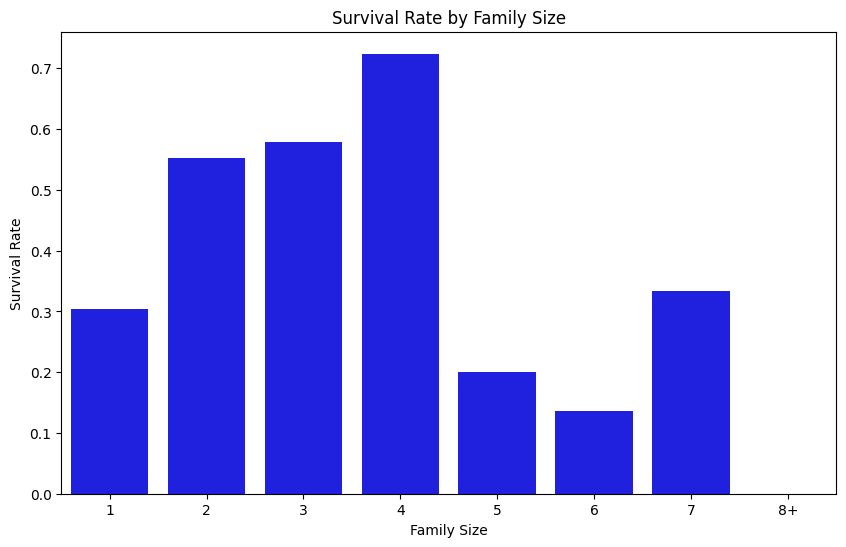

In [ ]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
# Calculate survival rates
family_survival_rate = titanic.groupby('FamilySize')['Survived'].mean().reset_index()
# Ensure we have a total of 7 bars: 1 to 7 and one for 8+
# Create a DataFrame for sizes 1 to 7
size_labels = list(range(1, 8))
survival_rates = []

# Calculate survival rates for family sizes 1 to 7
for size in size_labels:
    rate = family_survival_rate[family_survival_rate['FamilySize'] == size]['Survived'].values
    survival_rates.append(rate[0] if rate.size > 0 else 0)

# Calculate survival rate for family sizes greater than 7
rate_greater_than_7 = titanic[titanic['FamilySize'] > 7]['Survived'].mean()
survival_rates.append(rate_greater_than_7)

# Create a new DataFrame with family sizes 1 to 7 and '8+'
family_sizes = size_labels + ['8+']
family_survival_rate = pd.DataFrame({'FamilySize': family_sizes, 'SurvivalRate': survival_rates})

# Plotting Survival Rate by Family Size with one color
plt.figure(figsize=(10, 6))  # Optional: Set figure size
sns.barplot(data=family_survival_rate, x='FamilySize', y='SurvivalRate', color='blue')  # Use a single color

# Add title and labels
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')

# Show the plot
plt.show()

**Insight:** Medium-sized families might have had higher survival rates due to better support systems, while those traveling alone or with very large families might have faced more challenges.



### **Plot 10: Age Distribution Within Survival and Class**

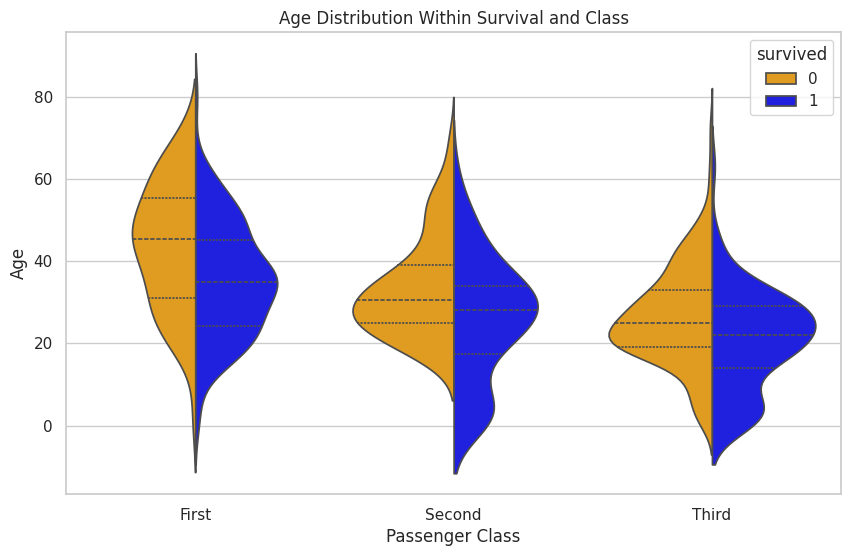

In [ ]:

sns.set(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y='age', hue='survived', data=titanic, split=True, inner="quart", palette={0: "orange", 1: "blue"})

# Add labels and title
plt.title('Age Distribution Within Survival and Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')

# Display the plot
plt.show()






**Insight:** This plot may reveal if younger or older passengers in certain classes were more likely to survive, possibly due to their physical ability, location of cabins relative to lifeboats, or the prioritization of rescue efforts.

### **Plot 11: Survival Probability by Age and Fare**

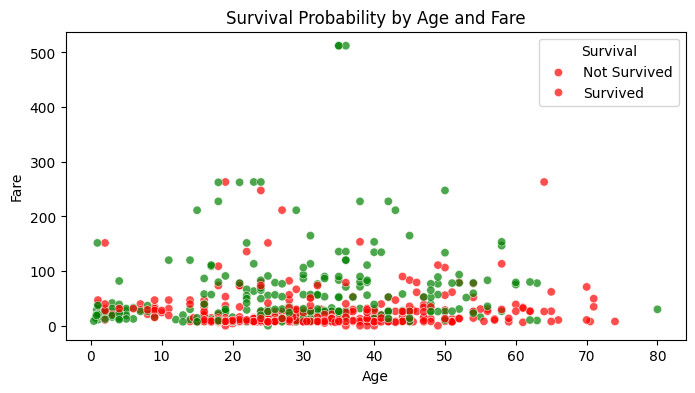

In [ ]:
plt.figure(figsize=(8, 4))  # Optional: Set figure size

# Scatter plot with survival probability represented by color
sns.scatterplot(data=titanic, x='Age', y='Fare', hue='Survived',
                palette={0: 'red', 1: 'green'}, alpha=0.7)

# Adding a title and labels
plt.title('Survival Probability by Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

# Customize legend
plt.legend(title='Survival', labels=['Not Survived', 'Survived'])

# Show the plot
plt.show()


**Simple Insight:** The scatter plot can visually suggest that younger passengers and those who paid higher fares had better chances of survival.

### **Plot 12: Multivariate Analysis of Pclass, Age, and Survival**

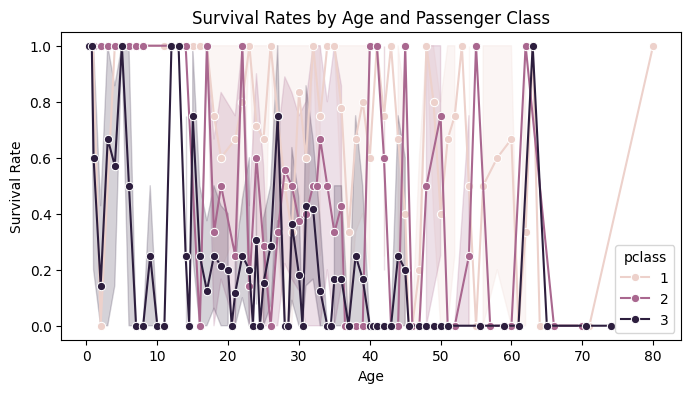

In [ ]:
titanic = sns.load_dataset('titanic')

titanic_cleaned = titanic.dropna(subset=['age', 'survived'])


# Set up the plot
plt.figure(figsize=(8, 4))

# Plotting a lineplot for survival rates by age and passenger class
sns.lineplot(data=titanic_cleaned, x='age', y='survived', hue='pclass', marker='o')

# Adding a title and labels
plt.title('Survival Rates by Age and Passenger Class')
plt.xlabel('Age')
plt.ylabel('Survival Rate')

# Show the plot
plt.show()

**Simple Insight:** This plot helps in understanding how survival rates vary with age in different passenger classes, showing that younger passengers in higher classes generally had better survival probabilities.

### **Plot 13 : Network Analysis of Cabin Sharing**

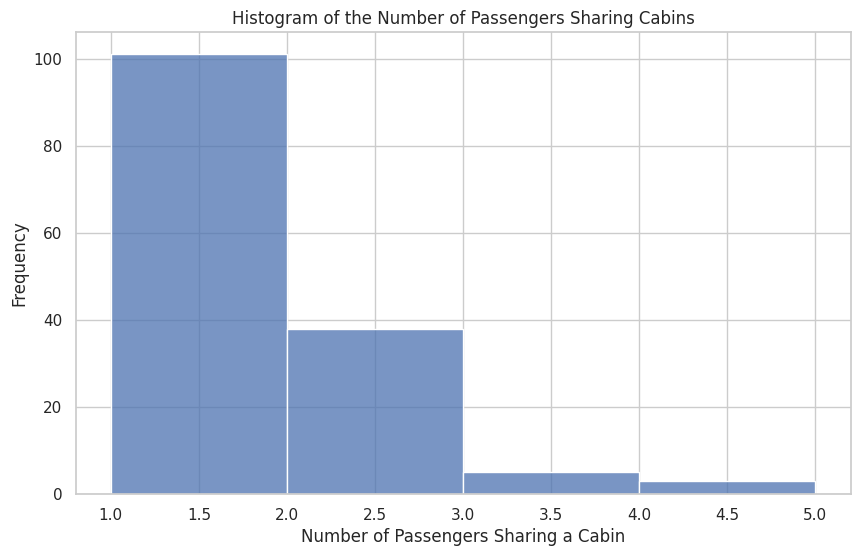

In [ ]:
sns.set(style="whitegrid")
# Count the number of passengers per cabin
cabin_counts = titanic['Cabin'].value_counts()
# Plot a histogram of the number of passengers sharing cabins
plt.figure(figsize=(10, 6))
sns.histplot(cabin_counts, bins=range(1, cabin_counts.max() + 2), kde=False)  # Adjust bins for better visualization

# Add labels and title
plt.xlabel('Number of Passengers Sharing a Cabin')
plt.ylabel('Frequency')
plt.title('Histogram of the Number of Passengers Sharing Cabins')

# Show the plot
plt.show()


**Simple Insight:** This histogram shows how frequently passengers shared cabins with different numbers of people, indicating that most cabins were shared by two or three passengers.